# Project: Investigate The - [Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
>Some of the Questions that we might ask about this data would be : 
- What is the most common genre in this data set ?
- What Genres provide the highest revenue ?
- What Genres provide the highest profit ?
- What are the top profitable movies ?
- What is the year with the most movies produced ?
- What months have the most and least movie production ?
- Which directors directed the highest number of movies?
- What are the characteristics of a good movie?
- What movie has the highest\lowest ratings ?
- Dose The run time of movies changed overtime (Years) ? What factors affect the incline\decline in the runtime ?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import trim_mean

In [60]:
!pip install -U seaborn

    100% |████████████████████████████████| 296kB 7.4MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.2MB/s eta 0:00:01   15% |█████                           | 1.8MB 22.9MB/s eta 0:00:01    56% |██████████████████              | 6.5MB 23.7MB/s eta 0:00:01    64% |████████████████████▋           | 7.4MB 16.9MB/s eta 0:00:01    78% |█████████████████████████▏      | 9.1MB 17.8MB/s eta 0:00:01    85% |███████████████████████████▌    | 9.9MB 15.8MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 8.9MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 590kB/s eta 0:00:01  0% |▎                               | 491kB 20.0MB/s eta 0:00:03    3% |█                               | 1.6MB 22.4MB/s eta 0:00:03    5% |█▊                              | 2.7MB 20.8MB/s eta 0:00:03    9% |███▏                            | 4.8MB 22.7MB/s eta 0:00:02    15% |█████                           | 7.7MB 17.6MB/s eta 0:00:03    17% |█████▋                     

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.options.display.max_rows = 9999
mov=pd.read_csv('tmdb-movies.csv')

In [4]:
#checking the first rows of data
mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Coloumns of the Data set
mov.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#Look at the types of Data and the missing col
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Notice That there are a lot of missing data in columns (homepage,tagline,keywords,production companies) some of those rows we actually don't need so we might drop them in the cleaning #Reminder for me

In [7]:
#How many rows and columns in the dataset
mov.shape


(10866, 21)

In [8]:
#Describe the data set
mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

 

In [9]:
#First we don't need the columns homepage,tagline,keywords,overview,imbd_id in our analysis so we are dropping them
mov.drop(['imdb_id','cast','homepage','tagline','keywords','overview','production_companies'],inplace=True,axis=1)


In [10]:
#check for columns
mov.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

__Missing Values Treatment__ : First we need to check using info

In [11]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


__There are 44 movies that dosen't have the director name so we are droping them as they are segnificant & There are 33 rows in genres that we are droping too , we can drop null values if they aren't going to affect our analysis if it small number of rows like 33 and 44 from 10000 rows__

In [12]:
#Handlling missing Values
mov.dropna(inplace=True)
#this is done to make the indecies back from 0-n
mov.reset_index(drop=True,inplace=True)

In [13]:
#check
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 14 columns):
id                10801 non-null int64
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


__Fixing The Data Types__ : budget, Revenue and Runtime columns are int but they should be float as it is an amount that might have percision and release_date column should be date 

In [14]:
mov[['budget','revenue','runtime']]=mov[['budget','revenue','runtime']].astype(float)

In [15]:
mov['release_date']=pd.to_datetime(mov['release_date'])

In [16]:
#Check
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 14 columns):
id                10801 non-null int64
popularity        10801 non-null float64
budget            10801 non-null float64
revenue           10801 non-null float64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null float64
genres            10801 non-null object
release_date      10801 non-null datetime64[ns]
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usage: 1.2+ MB


In [17]:
#check for duplicates 
mov.duplicated().sum()

1

In [18]:
#we have one duplicated row so we are dropping it
mov.drop_duplicates(inplace=True)

In [19]:
#check
mov.duplicated().sum()

0

In [20]:
mov['revenue'].mode()
mov['budget'].mode()

0    0.0
dtype: float64

All the coloumns names are not capitalized and consistant, all the data types are fixed except the release_year and i want it to be int, no missing data , no duplicates  but there is somthing in the revenue and budget column which is going to affect our analysis we have a lot of zeroes in both columns so we might take the median or the mean and fill in the missing data
the mode is zeros so the we cannt take the mode

In [21]:
rev_col=mov['revenue']
rev_col.replace(to_replace = 0, value = rev_col.mean(), inplace=True)
budget_col=mov['budget']
budget_col.replace(to_replace = 0, value = budget_col.mean(), inplace=True)

In [22]:
#check
mov[mov['revenue']<=0.0]
mov[mov['budget']<=0.0]
#it returns empty data frame we are Good now !

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


# Some Data Visualiztion to under stand the data

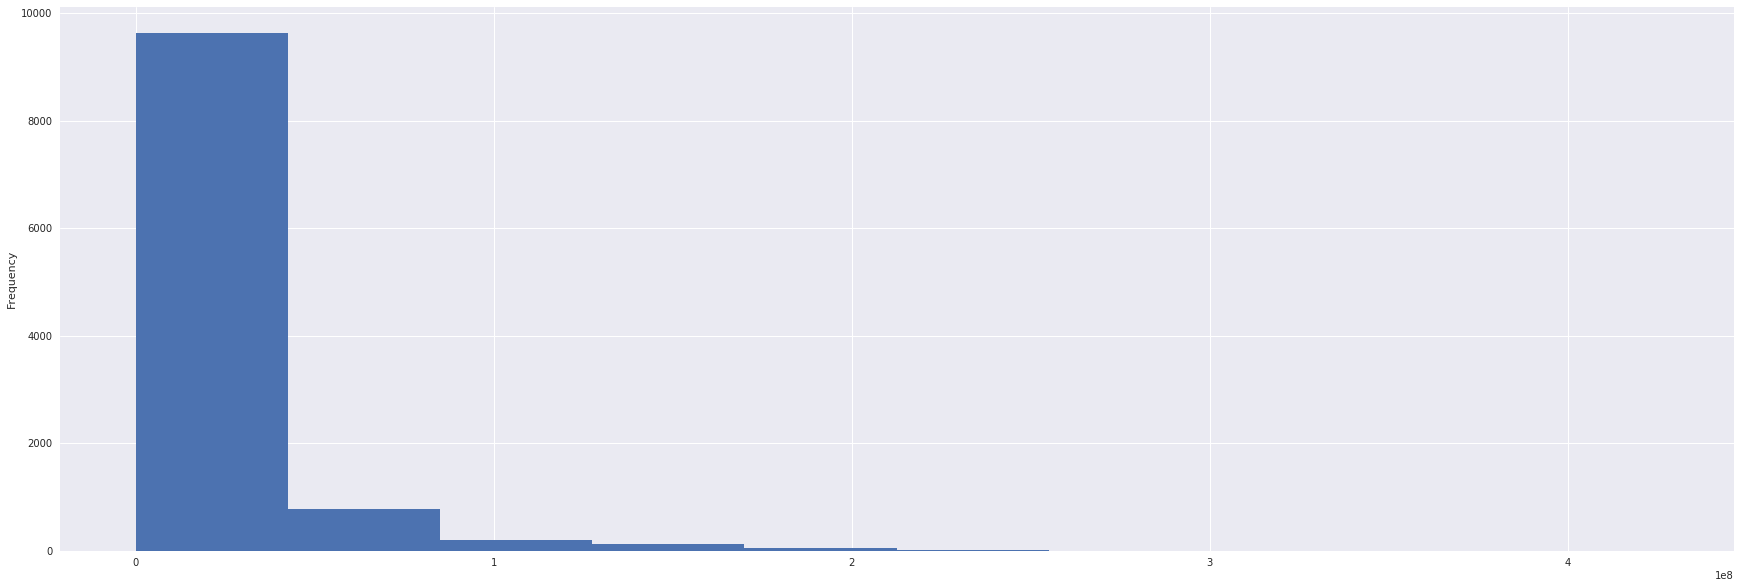

In [49]:
mov['revenue'].plot(kind='hist')
plt.title('Distribution of Revenue')

# Questions :

### What is the most common genre in this data set ?

In [23]:
mov['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10796                                  Documentary
10797                       Action|Adventure|Drama
10798                               Mystery|Comedy
10799                                Action|Comedy
10800                                       Horror
Name: genres, Length: 10800, dtype: object

__First we need to get the first genre of each movie as The genres column contian multiple values for one movie separated by "|"
so we will take only the first genre__


In [24]:
mov['genre_1']=mov['genres'].apply(lambda text: text.split('|')[0])
#now we don't need the generes column so i am dropping it
mov.drop('genres',axis=1,inplace=True)
#check
mov.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'genre_1'],
      dtype='object')

In [25]:
#get the most common genre how many movies have this genre
mov.groupby('genre_1')['original_title'].count().sort_values(ascending=False)

genre_1
Drama              2447
Comedy             2313
Action             1587
Horror              914
Adventure           586
Thriller            491
Documentary         424
Animation           398
Crime               380
Fantasy             272
Science Fiction     212
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  59
History              44
Western              42
Foreign               9
Name: original_title, dtype: int64

__It looks like Drama is the highest genre in our data
so lets visualize and see this with our eyes better than numbers__

Text(0,0.5,'Number of movies under genre')

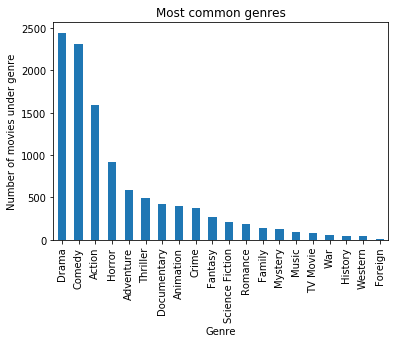

In [26]:
mov_genre=mov.groupby('genre_1')['original_title'].count().sort_values(ascending=False)
mov_genre.plot(kind='bar',title='Most common genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies under genre')

__Now  we know that Drama has the highest amount of movies but we want to know more Does drama provide the highest amount of money or in another words__

# What genre provides the highest revenue ?

In [27]:
mov_rev=mov.groupby('genre_1')['revenue'].sum().sort_values(ascending=False)
mov_rev

genre_1
Action             1.271360e+11
Comedy             1.185553e+11
Drama              1.133920e+11
Adventure          8.244229e+10
Animation          3.993528e+10
Horror             3.907132e+10
Thriller           2.470242e+10
Fantasy            2.375287e+10
Science Fiction    2.141355e+10
Crime              1.967721e+10
Documentary        1.431425e+10
Family             1.258055e+10
Romance            1.109351e+10
Mystery            5.944669e+09
Music              4.628419e+09
War                4.190978e+09
TV Movie           2.966787e+09
History            2.873375e+09
Western            2.147197e+09
Foreign            3.605902e+08
Name: revenue, dtype: float64

__What a surprise although Drama was the most common genre it is not the highest revenue , Action is the highest one !
Lets better see this with our eyes to believe__

Text(0,0.5,'Revenue in hundred billions')

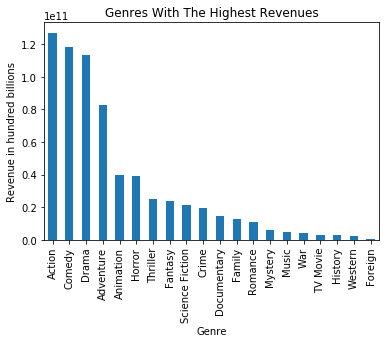

In [28]:
mov_rev.plot(kind='bar',title='Genres With The Highest Revenues')
plt.xlabel('Genre')
plt.ylabel('Revenue in hundred billions')

__Ok now let's search for more surprises lets see if action is also the most profitable movie or is another genre__ 

# What is the most profitable genre ?

In [29]:
#We need a profit coloumn to answer this question
mov['profit']=mov['revenue'].sub(mov['budget'])

In [30]:
profit_per_gen=mov.groupby('genre_1')['profit'].sum().sort_values(ascending=False)
profit_per_gen

genre_1
Action             7.822405e+10
Comedy             7.573068e+10
Drama              6.941217e+10
Adventure          5.559958e+10
Animation          2.750779e+10
Horror             2.713491e+10
Fantasy            1.541823e+10
Thriller           1.483592e+10
Science Fiction    1.468626e+10
Crime              1.229408e+10
Documentary        8.670446e+09
Family             8.589239e+09
Romance            7.522481e+09
Mystery            3.636886e+09
Music              2.708262e+09
War                2.373012e+09
TV Movie           1.932219e+09
History            1.848611e+09
Western            1.033260e+09
Foreign            2.281900e+08
Name: profit, dtype: float64

__Ok no more surprises action is the most profitable genre as we expected !__

Text(0,0.5,'Profit in Ten billions')

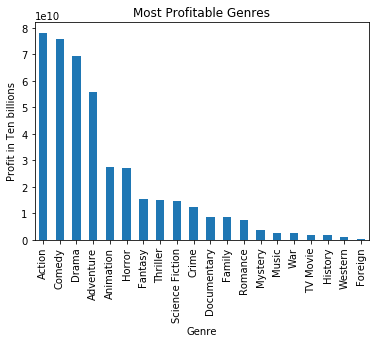

In [31]:
profit_per_gen.plot(kind="bar",title='Most Profitable Genres')
plt.xlabel('Genre')
plt.ylabel('Profit in Ten billions')

__Now lets see the most profitable movies i think they might be in the action genre or maybe comedy lets see__

# What are the top profitable movies ?

In [32]:
top_profitable_mov=mov[['original_title','genre_1','profit','budget','vote_average','popularity','runtime','director']].sort_values(by='profit',ascending=False)
top_15_mov=top_profitable_mov[0:15]
top_7_mov=top_profitable_mov[0:7]
top_7_mov

,original_title,genre_1,profit,budget,vote_average,popularity,runtime,director
1375,Avatar,Action,2.544506e+09,237000000.0,7.1,9.432768,162.0,James Cameron
3,Star Wars: The Force Awakens,Action,1.868178e+09,200000000.0,7.5,11.173104,136.0,J.J. Abrams
5188,Titanic,Drama,1.645034e+09,200000000.0,7.3,4.355219,194.0,James Cameron
0,Jurassic World,Action,1.363529e+09,150000000.0,6.5,32.985763,124.0,Colin Trevorrow
4,Furious 7,Action,1.316249e+09,190000000.0,7.3,9.335014,137.0,James Wan
4325,The Avengers,Science Fiction,1.299558e+09,220000000.0,7.3,7.637767,143.0,Joss Whedon
3339,Harry Potter and the Deathly Hallows: Part 2,Adventure,1.202818e+09,125000000.0,7.7,5.711315,130.0,David Yates


__Looks like Avatar movie is killing it far from the seconed best movie by more than 0.3 billion dollars lets visualize the top ten movies of all time according to our data set__

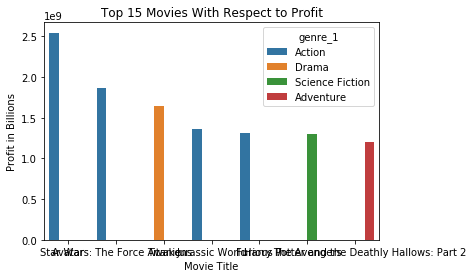

In [33]:
sns.barplot(x="original_title",y='profit',data=top_7_mov,hue="genre_1")
sns.set(rc={"figure.figsize":(30, 10)})
plt.title('Top 15 Movies With Respect to Profit')
plt.xlabel('Movie Title')
plt.ylabel('Profit in Billions')
plt.show()

__We See that avatar is the highest movie that generated more than 2.5 billion Dollars profit That's alot of money i mean 10 zeros , Great job !! , We Could see also why the action is the most profitable : 4 out of the top 7 movies are in the action genre but how are those movies so successful we need to know a reason__

# What are the characteristics of the Most successful Movies ? 

In [34]:
#First lets get the mean profit of all movies
mean_profit=mov['profit'].mean()
mean_profit
#40 Million is a big number , it might be the outliers so lets clear the top 5 movies and try again
mean_trim=trim_mean(mov['profit'],0.05)
mean_trim

26231771.159525976

__Now 26 million Dolars is a more reasonable than 40 Million Dolars for a movie to be successful we need to know what movies are higher than this number and then identify their characteristics__

In [35]:
successful_movies=mov[mov["profit"] >=mean_trim]
successful_movies.shape

(2823, 15)

__There are 2823 successful movie that's a Good number out of the 10k movies according to our standards which is the profit so what is the mean ,median budget spent on a Good movie and what is the average Rating of those movies and popularity lets check those questions__

# What is the average budget and the median budget for a good movie ?

In [36]:
mean_bud=trim_mean(successful_movies['budget'],0.05)
median_bud=successful_movies['budget'].median()
mean_bud
median_bud

14711137.323055556

__We are talkking about 30 Million Dolar budget for a good movie according to the mean and nearly 15 million according to the median What about the Top 5 movies what was their budget__

Text(0,0.5,'budget in 100 Million')

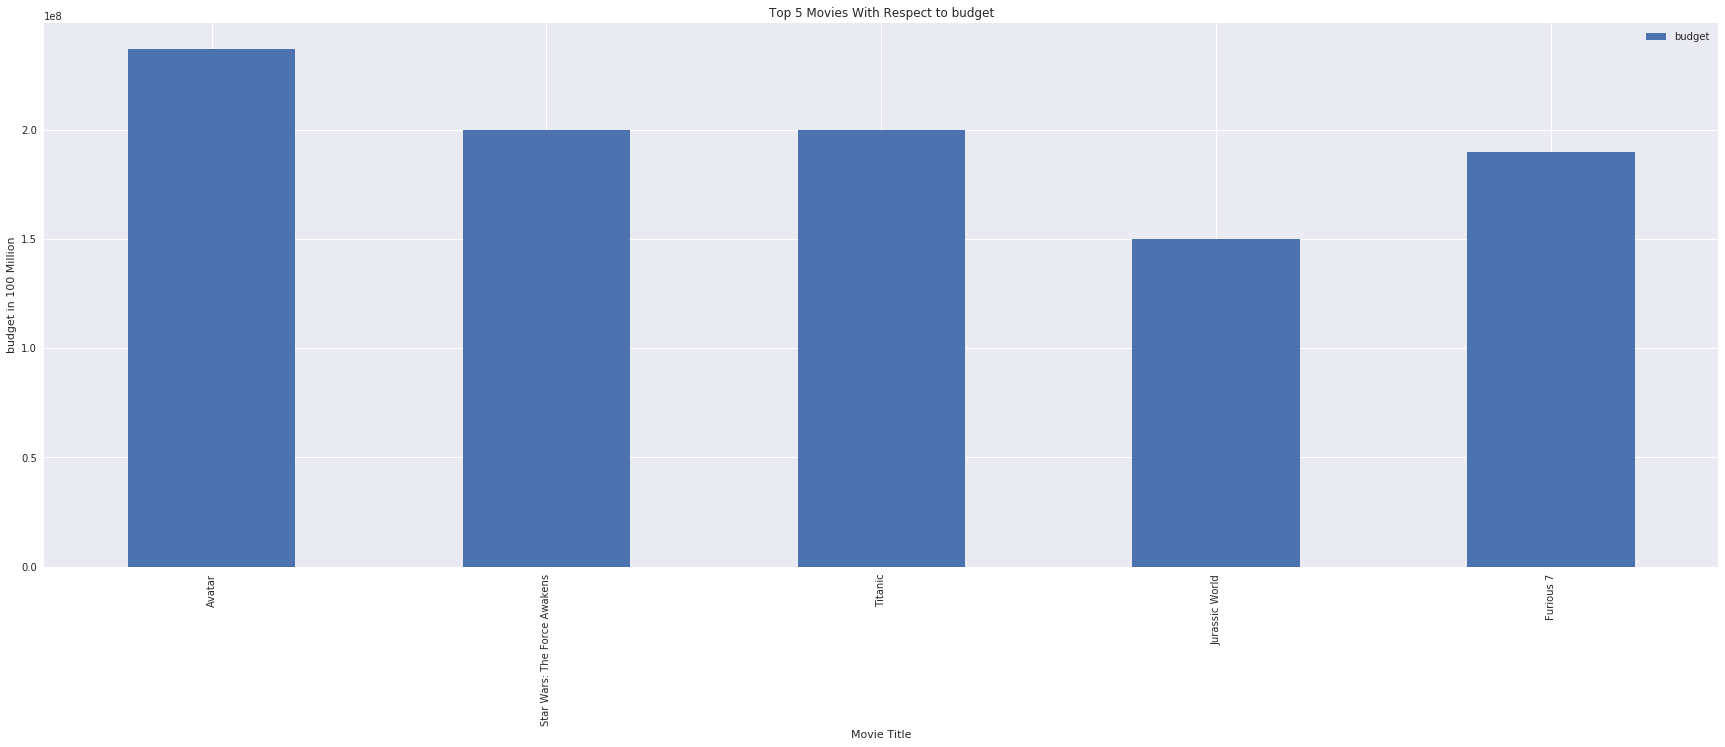

In [37]:
budget_of_top_5=top_7_mov[0:5][['original_title','budget']]
mean_5=budget_of_top_5.mean()
mean_5
budget_of_top_5.plot(kind='bar',x='original_title')
plt.title('Top 5 Movies With Respect to budget')
plt.xlabel('Movie Title')
plt.ylabel('budget in 100 Million')

__To be successful is good but to be in the Top 5 you need to spend about 195400000 Dollars That's the mean for the Top Films,
Cost of Reaching the peak Right :) ? Thats why we needed to exclude those movies from the mean calculations__

# What is the Average Rating for a Successful movie and a Top movie  ?

In [38]:
average_rating=trim_mean(successful_movies['vote_average'],0.05)
average_rating

6.139630066902794

__You Need To have higher than 6.1 Average Rating in order to be successful movie What about the Top movies__

In [39]:
Top_avg_rating=top_7_mov[0:5]['vote_average'].mean()
Top_avg_rating

7.139999999999999

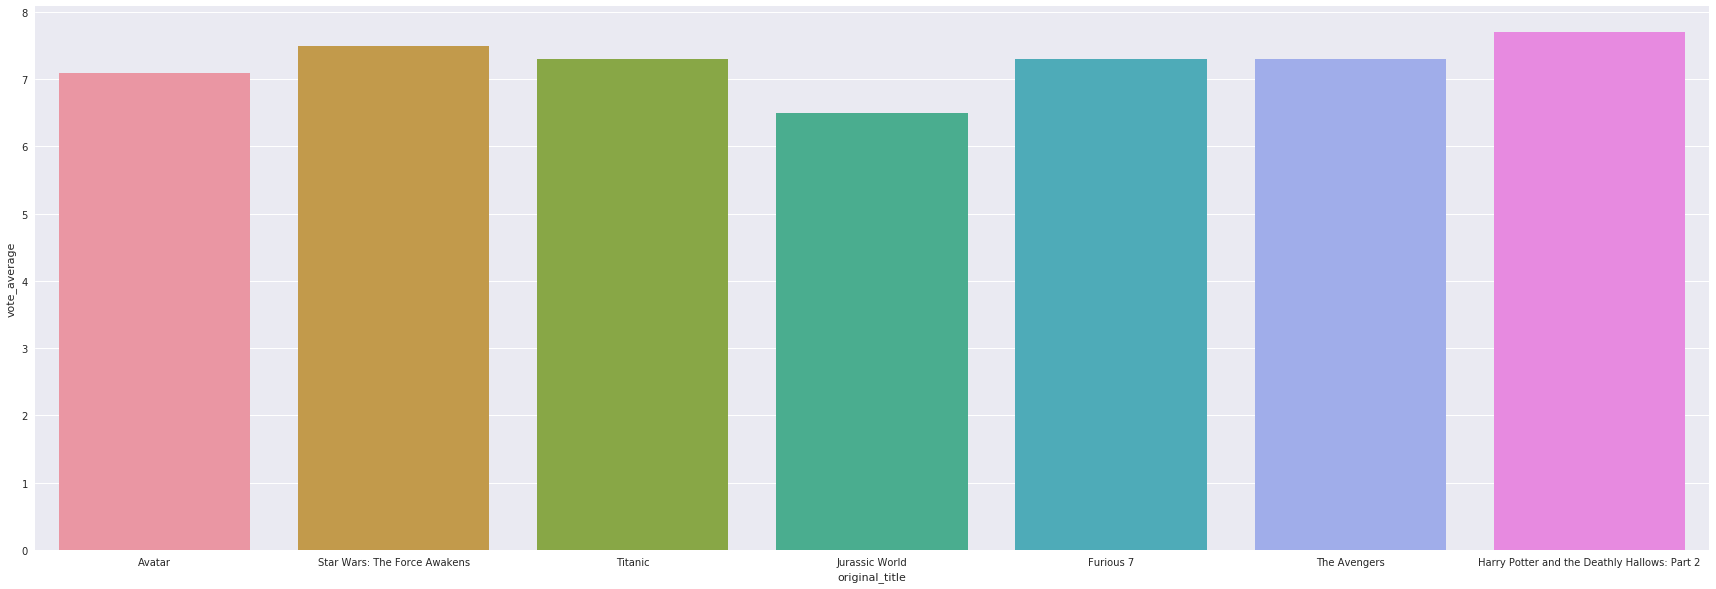

In [104]:
sns.barplot(x=top_7_mov['original_title'],y=top_7_mov['vote_average'],data=top_7_mov)
plt.show()

__You Need To have higher than 7.1 Average Rating in order to be in Top movies__

__Popularity of the successful and the Top movies :__

In [40]:
trim_mean(successful_movies['popularity'],0.05)

1.0442129020070838

__You Need on average 1.1 popularity in order to be successful__

In [41]:
top_7_mov['popularity'].mean()

11.51870714285714

__You Need on average 11.5 popularity in order to be at the peak__

# What movie has the highest-lowest ratings ?

In [126]:
highest_rated_movie=mov[mov['vote_average']==mov['vote_average'].max()][['original_title','vote_average','budget','profit']]
lowest_rated_movie=mov[mov['vote_average']==mov['vote_average'].min()][['original_title','vote_average','budget','profit']]
highest_rated_movie

,original_title,vote_average,budget,profit
3859,The Story of Film: An Odyssey,9.2,1.471114e+07,2.535444e+07


The highest rated movie is : The Story of Film: An Odyssey

In [125]:
lowest_rated_movie

,original_title,vote_average,budget,profit
7717,Transmorphers,1.5,1.471114e+07,2.535444e+07
10800,Manos: The Hands of Fate,1.5,1.900000e+04,4.004658e+07


The lowest rated movies are : Transmorphers	, Manos: The Hands of Fate

# Who directed the Most successful movies ?

In [42]:
mov['1st_director']=mov['director'].apply(lambda text: text.split('|')[0])
mov['1st_director']

0           Colin Trevorrow
1             George Miller
2          Robert Schwentke
3               J.J. Abrams
4                 James Wan
                ...        
10796           Bruce Brown
10797    John Frankenheimer
10798        Eldar Ryazanov
10799           Woody Allen
10800      Harold P. Warren
Name: 1st_director, Length: 10800, dtype: object

In [43]:
top_15_mov.groupby('director')['original_title'].count().sort_values(ascending=False)

director
Joss Whedon                 2
James Cameron               2
Shane Black                 1
Sam Mendes                  1
Peter Jackson               1
Michael Bay                 1
Kyle Balda|Pierre Coffin    1
James Wan                   1
J.J. Abrams                 1
Irwin Winkler               1
David Yates                 1
Colin Trevorrow             1
Chris Buck|Jennifer Lee     1
Name: original_title, dtype: int64

__We have Two Directors that seems to be peak persons which are Joss Whedon and James Cameron , They Directed not 1 but 2 of the most successful movies of all time according to our Data__

# Who Directed the Most Number of movies ?


Text(0,0.5,'Count of Movies Directed')

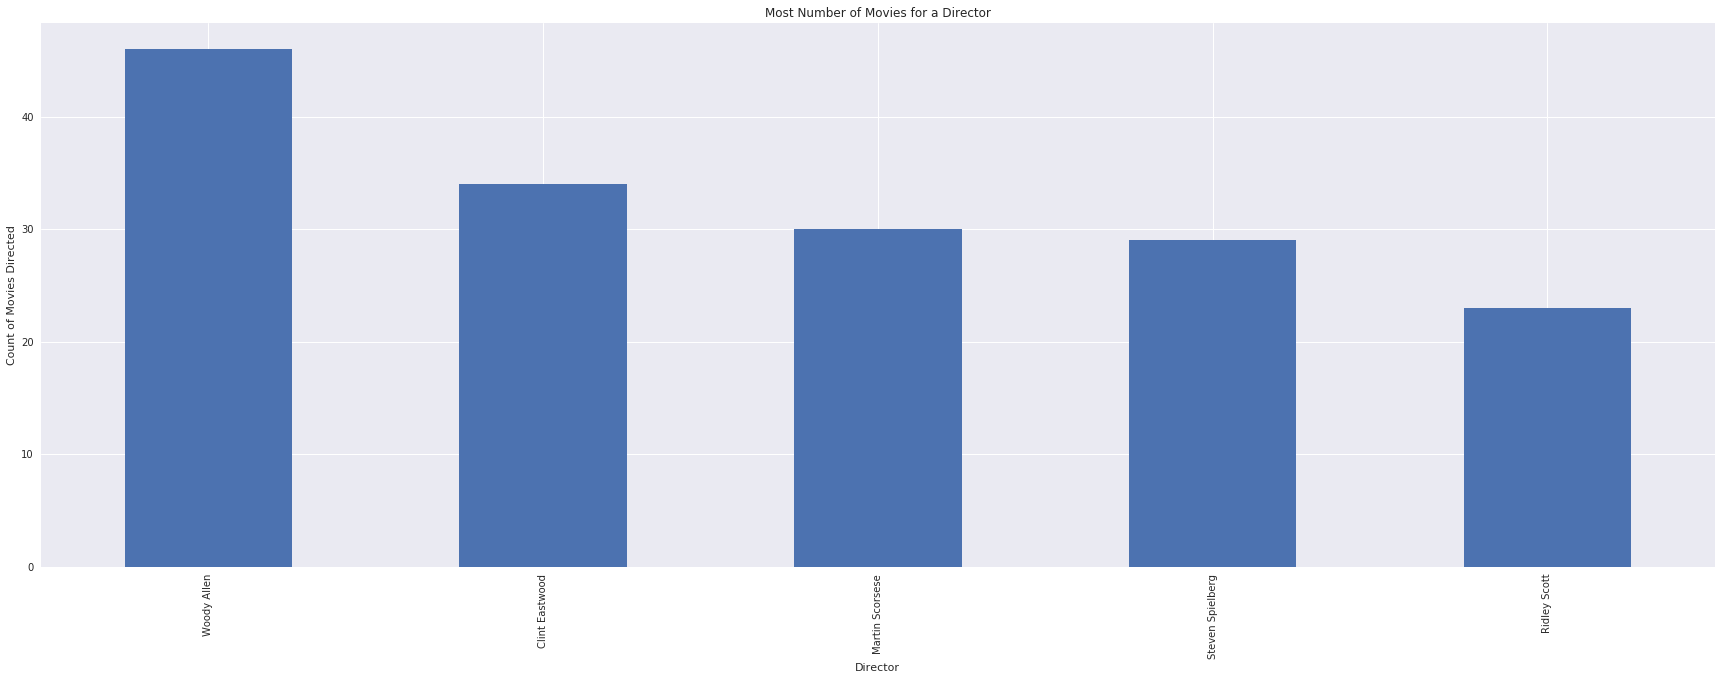

In [143]:
top_dir=mov.groupby('1st_director')['original_title'].count().sort_values(ascending=False)

#Woody allen directed the most movies lets see that through viz
top_dir[0:5].plot(kind='bar',title='Most Number of Movies for a Director')
plt.xlabel('Director')
plt.ylabel('Count of Movies Directed')

Text(0.5,1,'Scatter plot between two variables budget and revenue')

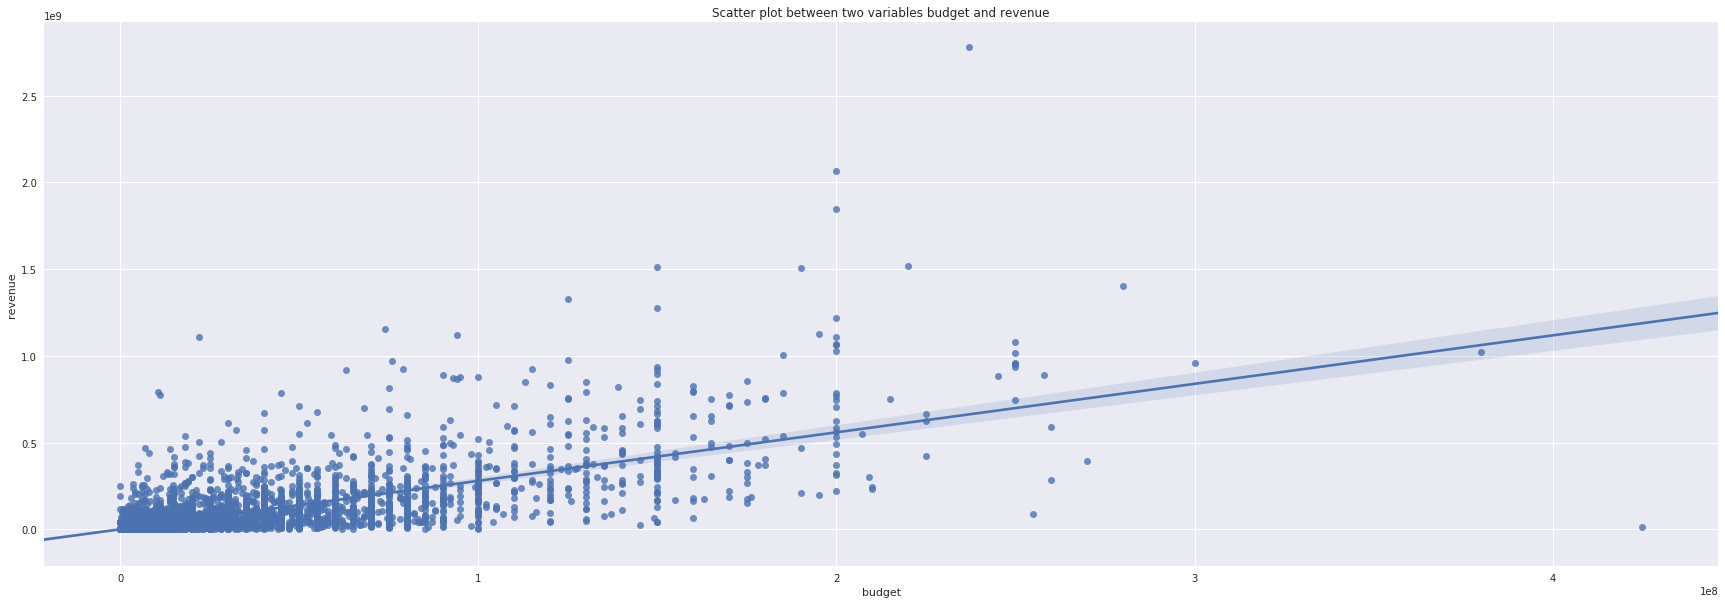

In [87]:
xd=mov['budget']
yd=mov['revenue']
sns.regplot(x=xd, y=yd);
plt.title("Scatter plot between two variables budget and revenue") 

__There is a postive relationship between the budget and profit that insures our analyis as the Top 10 movies budget were very far from the mean__

In [88]:
np.corrcoef(xd, yd)

array([[1.        , 0.70514562],
       [0.70514562, 1.        ]])

Text(0.5,1,'Scatter plot between two variables vote_average and profit')

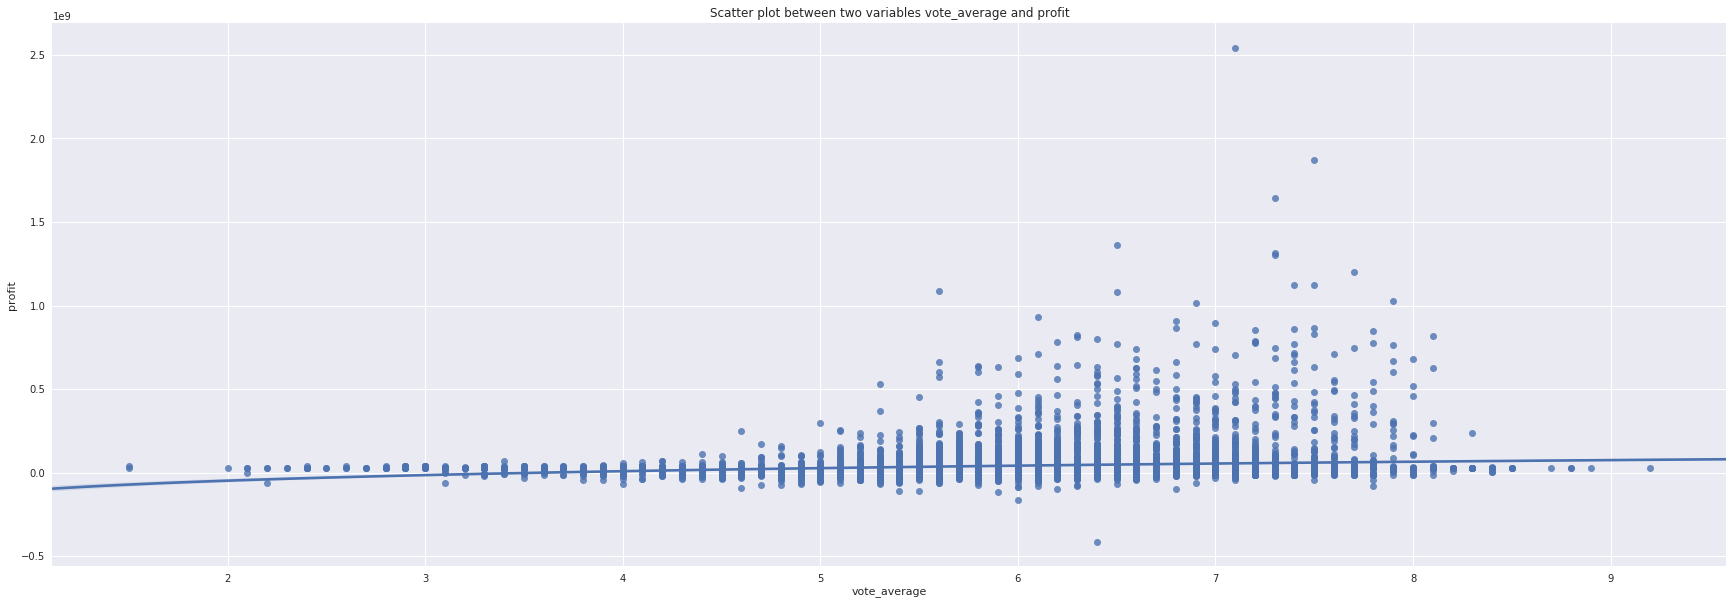

In [92]:
xa=mov['vote_average']
ya=mov['profit']
sns.regplot(x=xa, y=ya,logx=True);
plt.title("Scatter plot between two variables vote_average and profit") 

__Seems like those with vote average higher than seven have got a better chance to be at the peak of the movies with respect to profit , but it is not neccessarly that if you have the highest Vote you will have the highest profit as we saw up in the average voting barplot but you must have higher than 6.5 in order to have that high profit__

# What is the year with the most movies produced ?

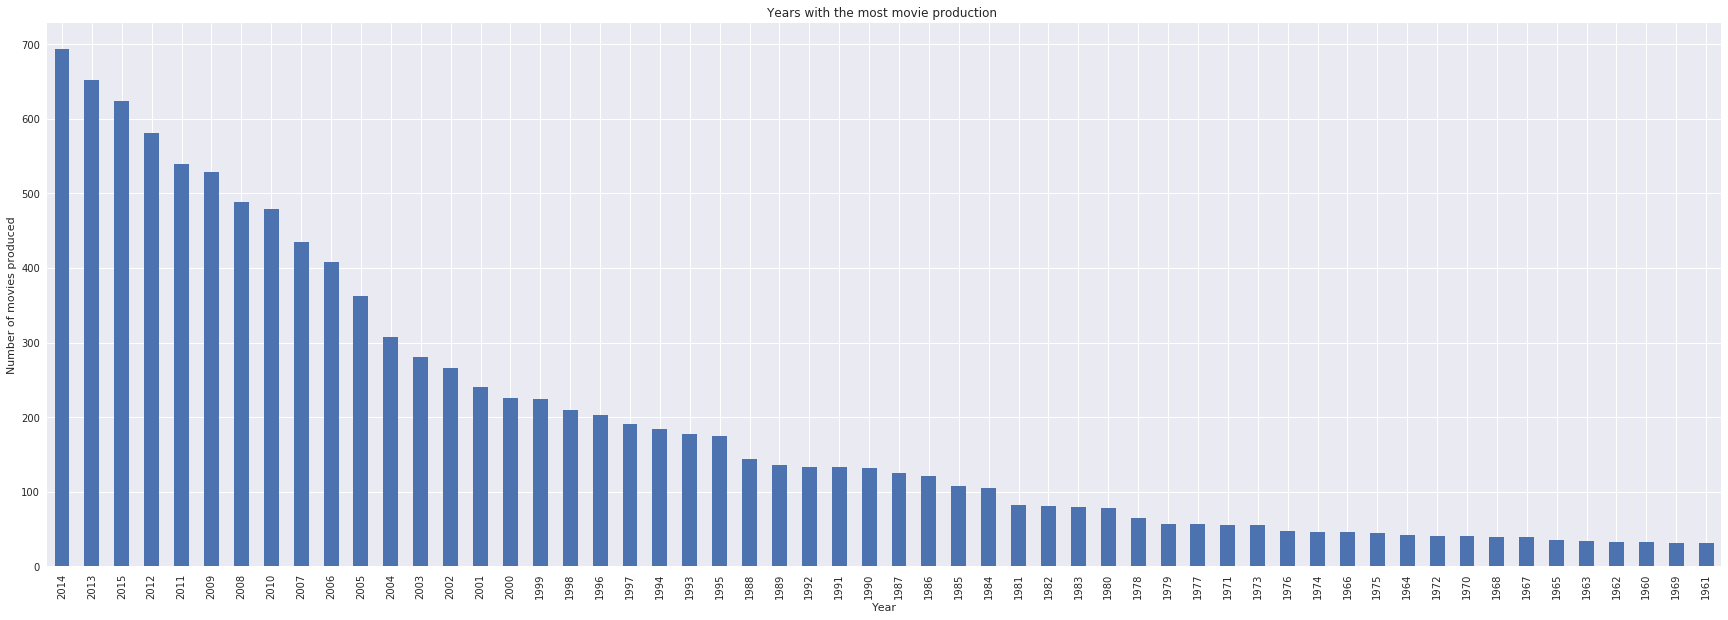

In [94]:
mov.groupby('release_year')['original_title'].count().sort_values(ascending=False).plot(kind="bar",title="Years with the most movie production ")
plt.xlabel('Year')
plt.ylabel('Number of movies produced')
plt.show()

__it seems that the production of movies reach its peak in 2014 with almost 700 movies produced, this is ordaniry as the movie bussniess is becoming widely known year by year__

__What months have the most and least movie production ?__

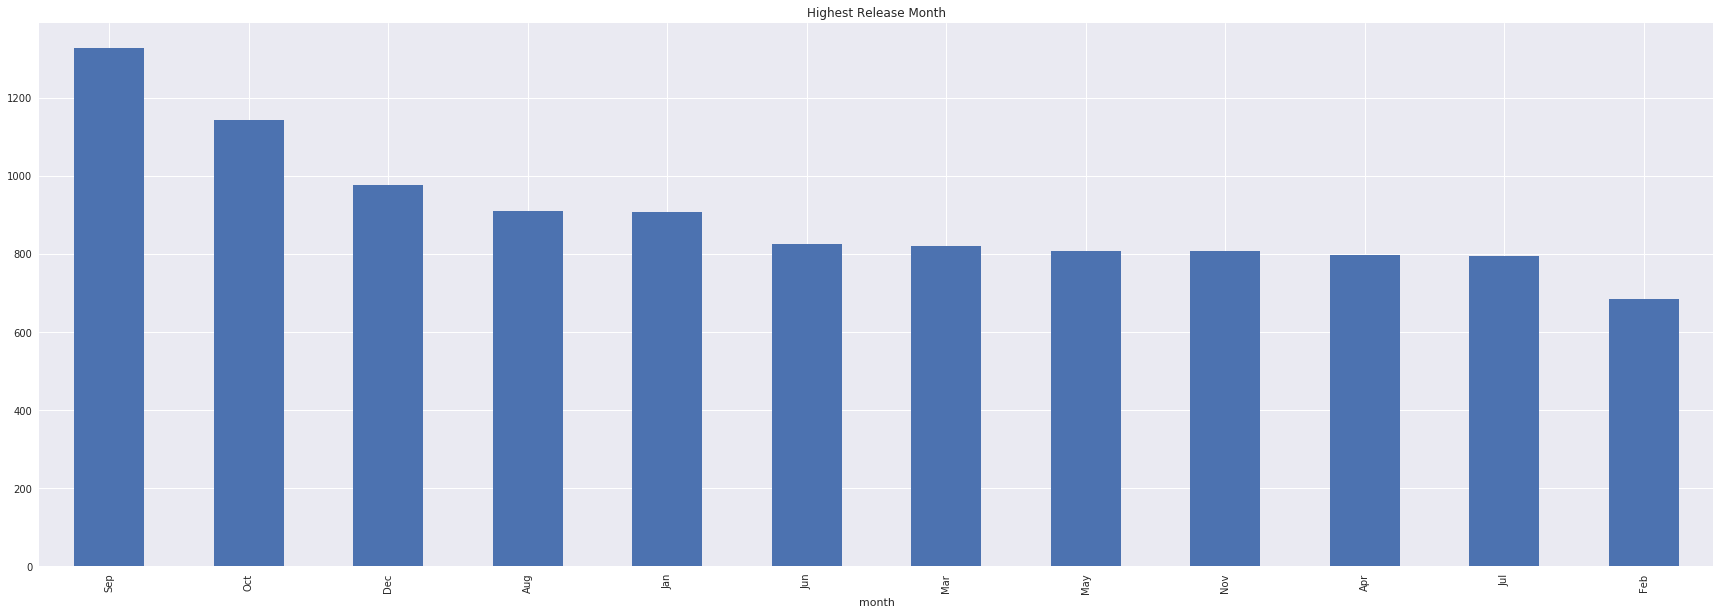

In [103]:
mov['month']=mov['release_date'].dt.strftime('%b')
data_by_month=mov.groupby('month')['original_title'].count().sort_values(ascending=False)
data_by_month.plot(kind='bar',title='Highest Release Month')
plt.show()

__September is the highest month that movies are released in by over 1200 movies released in this month,
his is primarily so because, during the summer months of Sep, movies are promoted as events
Schools are closed, children are looking for entertainment and parents are also less fatigued as many take vacations. If the cinema halls will be full, naturally, the producers and distributors will make more money.__

# What is the mean Run time of Movies ?

In [137]:
runtime=mov[mov['runtime']>40]['runtime']
mean_runtime=runtime.mean()
mean_runtime

104.2036160545248

Text(0.5,1,'The Distribution of The Runtime Variable')

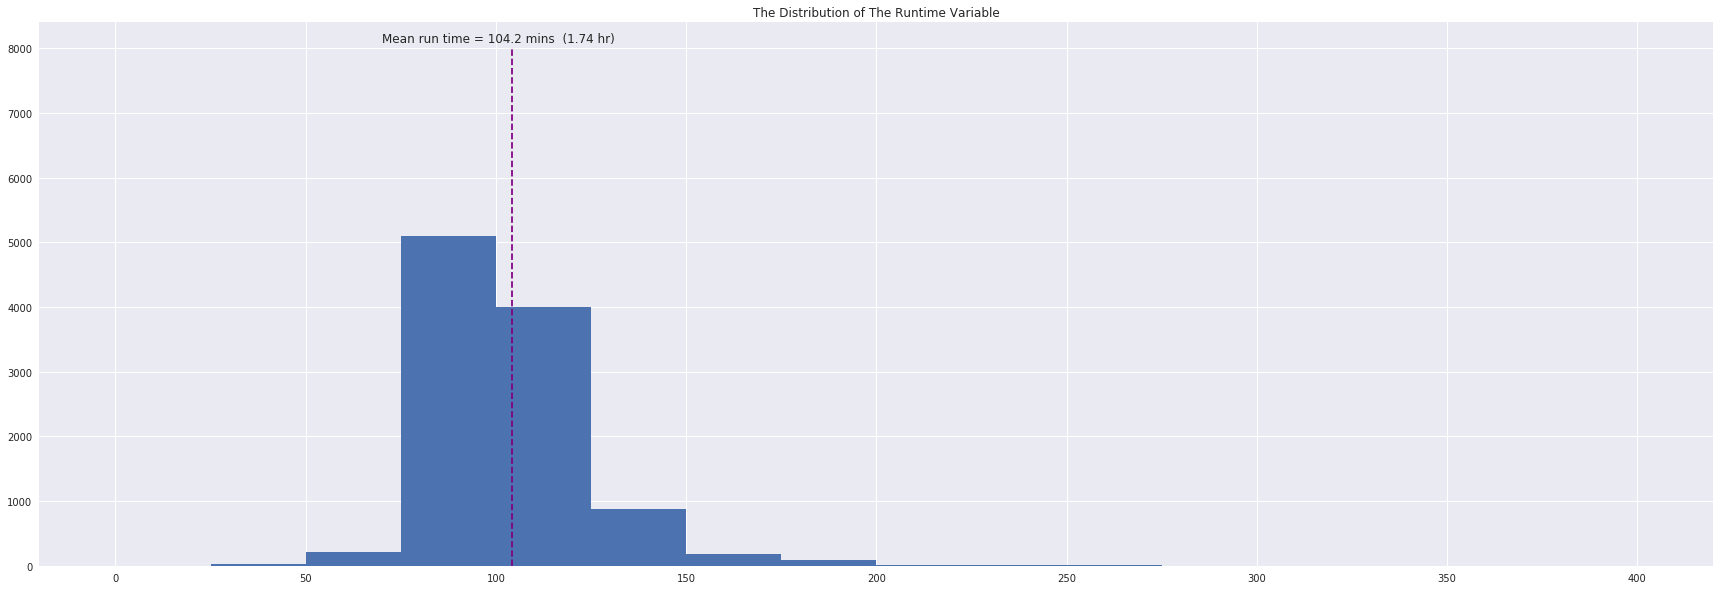

In [142]:
runtime.hist(bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400])
plt.vlines(x = mean_runtime, ymin = 0,ymax=8000,
           colors = 'purple',
           label = 'vline_multiple - full height',
           linestyles='dashed')
plt.text(70,8100,'Mean run time = 104.2 mins  (1.74 hr)')
plt.title('The Distribution of The Runtime Variable')

__The Curve is Right skeewed meaning most have a runtime greater tahn zero and 150 Mins and less than 200 Mins __

__Run Time of The Top 15 Movies :__

In [139]:
Top_movies_runtime=top_15_mov['runtime'].mean()
Top_movies_runtime

140.13333333333333

__Looks like the Top 15 movies are higher than the mean even in the Run time length Not only their profit and Rating__

Text(0.5,1,'Runtime Vs Release Year')

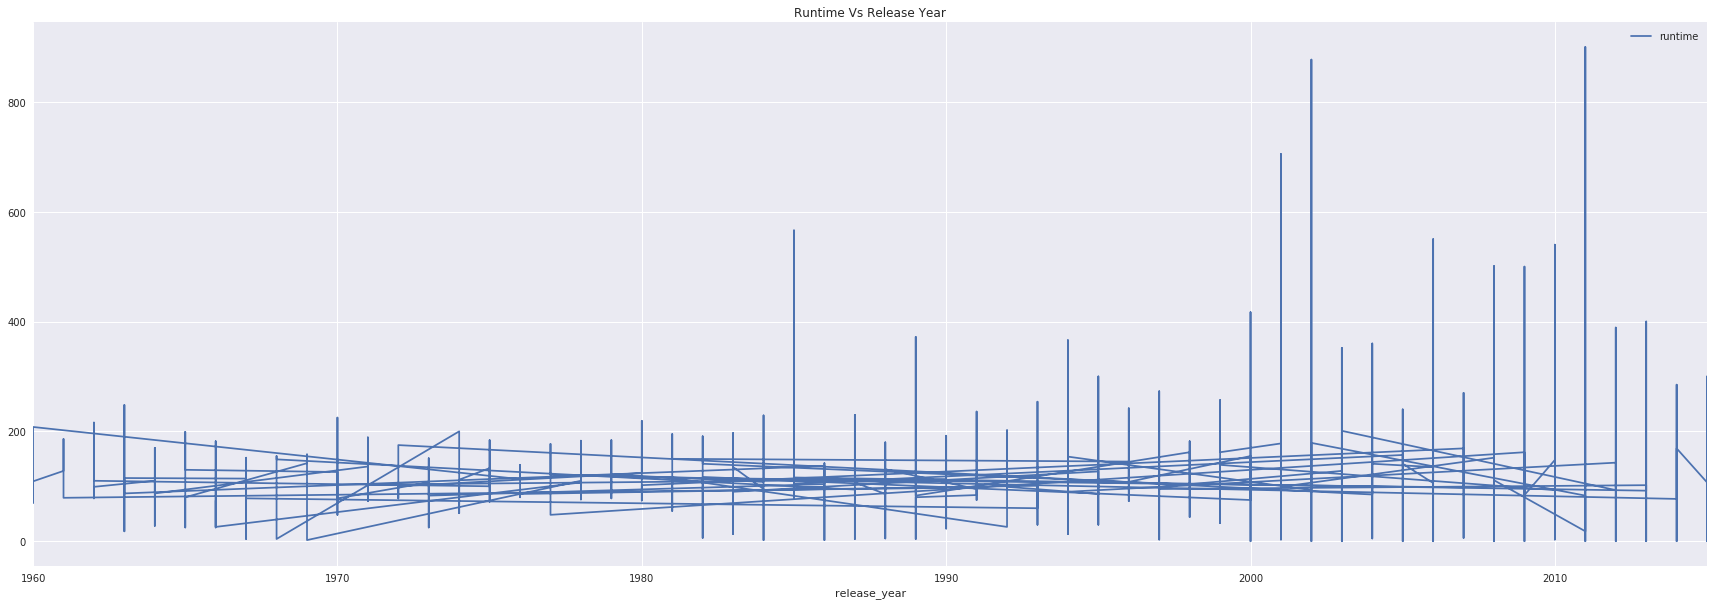

In [145]:
mov.plot(x='release_year',y='runtime')
plt.title("Runtime Vs Release Year")

__The Relation between this two variables is not clear and needs further analysis__

<a id='conclusions'></a>
## Conclusions

> **Finally**: 
-What is the most common genre in this data set ?

  Drama
  
__What Genres provide the highest revenue ?__

  Action
  
__What Genres provide the highest profit ?__

  Action
  
__What are the top profitable movies ?__

   Avatar, Star Wars:The Force Awakens ,Titanic, Jurassic world, furious 7 , Harry Potter and the Deathly Hallows:Part 2 , The Avengers		
    
__What is the year with the most movies released ?__

2014 Was the highest Release year for films and this is simply because the movie bussiness is getting bigger by time but this needs further analysis .

__What months have the most and least movie production ?__

September , because this time of the year is vacation for both childrens and adults coming back from their jobs and is last month in summer so people would be less fatuge to go out but we need further anlysis to make sure

__Which directors directed the highest number of movies?__

Woody Allen                          46 Movies
Clint Eastwood                       34 Movies
Martin Scorsese                      30 Movies
Steven Spielberg                     29 Movies
Ridley Scott                         23 Movies
Ron Howard                           22 Movies
Steven Soderbergh                    22 Movies

__What are the characteristics of a good movie?__

  They have mean profit of 26 million or higher 30 Million Dolars budget or more ,You Need To have higher than 6.1 Average       Rating in order to be a successful movie and more Than 1.1 popularity but Great movies have other specs that i mentioned in     the markk down cells up-top
  
__What is the mean Run time of Movies ?__

 104.2 Mins , and the movies runtime lies between 60 to 150 mins or less than 200 mins

__Did the mean time of movies changed over time ?__
 This needs further analysis
__What movie has the highest\lowest ratings ?__

 The highest rated movie is : The Story of Film: An Odyssey
 The lowest rated movies are : Transmorphers , Manos: The Hands of Fate


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])